In [4]:
%matplotlib inline



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from deltasigma import synthesizeNTF, plotPZ, dbv, evalTF, figureMagic, rmsGain

NTF synthesis - demo #1
=======================

Demonstration of the **`synthesizeNTF`** function, as done in the **MATLAB Delta Sigma Toolbox**, employing its Python port **`deltasigma`**.



 * The **Noise Transfer Function** (NTF) is synthesized for a **5th-order**, **low-pass** modulator.

     * The first section deals with an **NTF without optimized zeros** (`opt=0`), 
     * while the second section with an **NTF *with optimized* zeros** (`opt=1`). 
     * Finally the two transfer functions are compared.

 * Then we move on to the synthesis of an **8th-order band-pass modulator** with optimized zeros.

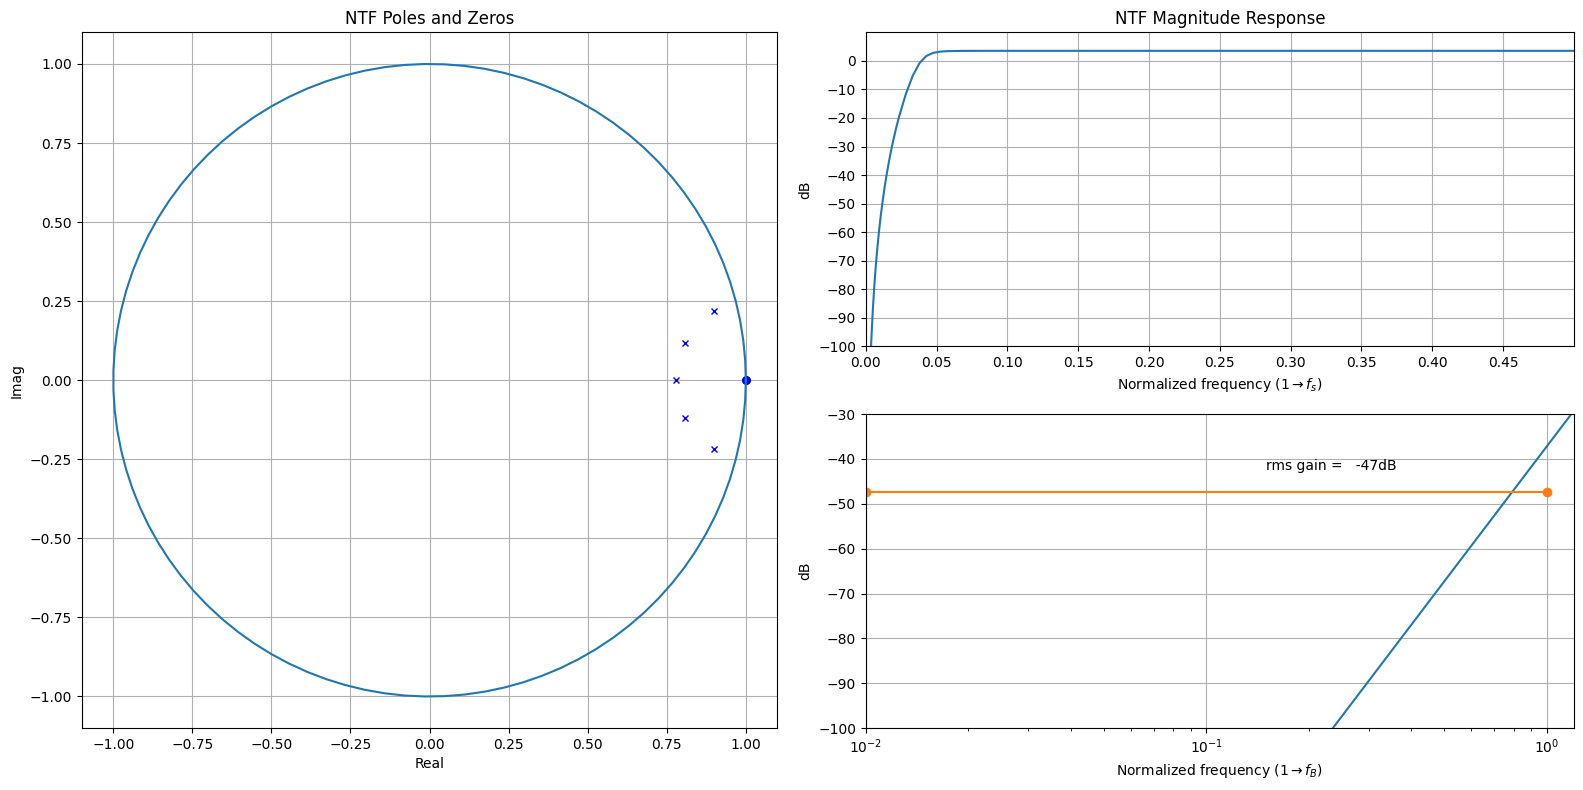

In [6]:
order = 5
OSR = 32

# Synthesize!
H0 = synthesizeNTF(order, OSR, opt=0)

# 1. Plot the singularities.
plt.figure(figsize=(12, 6))
plt.subplot(121)
plotPZ(H0, markersize=5)
plt.title('NTF Poles and Zeros')

f = np.concatenate((np.linspace(0, 0.75/OSR, 100), np.linspace(0.75/OSR, 0.5, 100)))
z = np.exp(2j*np.pi*f)
magH0 = dbv(evalTF(H0, z))

# 2. Plot the magnitude responses.
plt.subplot(222)
plt.plot(f, magH0)
figureMagic([0, 0.5], 0.05, None, [-100, 10], 10, None, (16, 8))
plt.xlabel('Normalized frequency ($1\\rightarrow f_s$)')
plt.ylabel('dB')
plt.title('NTF Magnitude Response')

# 3. Plot the magnitude responses in the signal band.
plt.subplot(224)
fstart = 0.01
f = np.linspace(fstart, 1.2, 200)/(2*OSR)
z = np.exp(2j*np.pi*f)
magH0 = dbv(evalTF(H0, z))
plt.semilogx(f*2*OSR, magH0)
plt.axis([fstart, 1.2, -100, -30])
plt.grid(True)

sigma_H0 = dbv(rmsGain(H0, 0, 0.5/OSR))
plt.semilogx([fstart, 1], sigma_H0*np.array([1, 1]),'-o')
plt.text(0.15, sigma_H0 + 5, 'rms gain = %5.0fdB' % sigma_H0)
plt.xlabel('Normalized frequency ($1\\rightarrow f_B$)')
plt.ylabel('dB')
plt.tight_layout()

plt.show()